# Lecture 6c: Neural Network Learning Part 4

3/24/2023

## Using Keras Library:
 
 - Multi Class Classification: 10 Classes

#### Import Libraries:

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from random import randint
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from keras.utils.np_utils import to_categorical # Convert Class Vectors to Binary Class Matrices
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

#### Define Functions For Plotting:

In [2]:
# plot training accuracy and loss
def plotCurve(trainingAccuracy, trainingLoss):
    epochs = np.arange(trainingLoss.shape[0])
    #print(epochs)
    plt.figure(figsize = [12, 6])
    plt.subplot(1, 2, 1)
    plt.plot(epochs, trainingAccuracy)
    #plt.axis([-1, 2, -1, 2])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs, trainingLoss)
    plt.xlabel('Epoch')
    plt.ylabel('Binary CrossEntropy Loss')
    plt.title('Training Loss')
    plt.show()

# Plot MNIST Images in subplots
def img_plt(img, label):
    plt.figure(figsize=(12, 5.5))
    for i in range (1, 11):
        plt.subplot(2, 5, i)
        plt.imshow(img[i - 1, :, :], cmap = 'gray')
        plt.title('Label: ' + str(label[i - 1]))
    plt.show()

#### Load MNIST Dataset & Split Into Training & Testing Sets:

In [3]:
# Load Data and Split to Training and Testing Sets:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#print(x_train.shape) # (60000, 28, 28)
#print(y_train.shape) # (60000,)
#print(x_test.shape) # (10000, 28, 28)
#print(y_test.shape) # (10000,)

print('The number of Training Images =', x_train.shape[0])
print('The number of Training Labels =', y_train.shape[0])
print('The size of each Training Image is:', x_train.shape[1], 'by', x_train.shape[2], 'pixels \n')
print('The number of Testing Images =', x_test.shape[0])
print('The number of Testing Labels =', y_test.shape[0])
print('The size of each Testing Image is:', x_test.shape[1], 'by', x_test.shape[2], 'pixels')

The number of Training Images = 60000
The number of Training Labels = 60000
The size of each Training Image is: 28 by 28 pixels 

The number of Testing Images = 10000
The number of Testing Labels = 10000
The size of each Testing Image is: 28 by 28 pixels


#### Plot Digits 0 - 9 From The Training Set:

 - For Each Digit, Select A Random Sample.

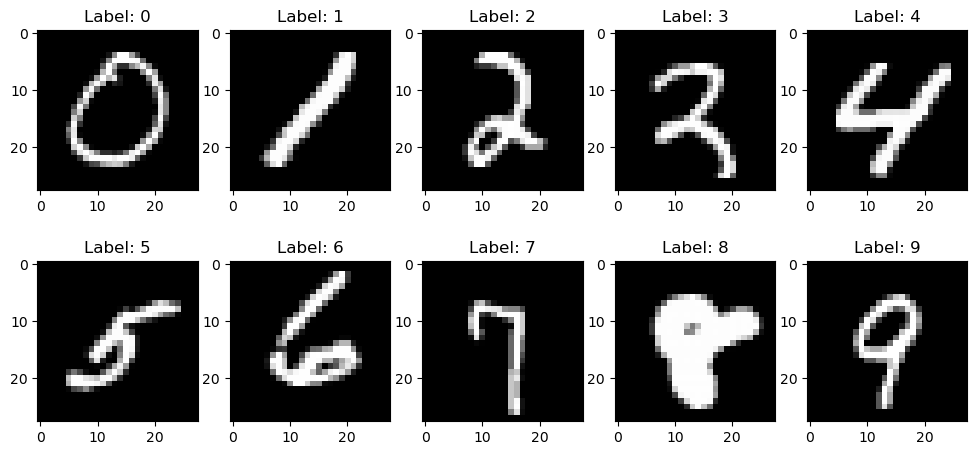

In [4]:
# Select 10 images from the training set
x_train_rnd = np.zeros((10, 28, 28))
y_train_rnd = np.arange(10)

for digit in range(10): # finds 10 images from the set
    x_train_d = x_train[y_train == digit,:,:]
    #x_train_rnd[digit,:,:] = x_train_d[0,:,:] # Select FIRST Digits From Set
    x_train_rnd[digit,:,:] = x_train_d[randint(0, x_train_d.shape[0]),:,:] # Select RANDOM Digits From Set

img_plt(x_train_rnd, y_train_rnd) # plot the images

#### Divide Training Set Into Training and Validation Sets

 - Create Shuffled Array Indices.
 - Shuffle Training and Testing Data.
 - Pull 1st 500 Images from Training Set and Designate as Validation Set.
    - The Remainder Of The Training Set is the New Training Set.

In [5]:
# create array with 60000 indices for TRAINING:
train_indices = np.arange(0, x_train.shape[0])
#print(train_indices)

# create array with 10000 indices for TESTING:
test_indices = np.arange(0, x_test.shape[0])
#print(test_indices, '\n')

# shuffle the indices of the training array
shuffled_indices_train = np.random.permutation(train_indices)
#print(shuffled_indices_train)

# shuffle the indices of the testing array
shuffled_indices_test = np.random.permutation(test_indices)
#print(shuffled_indices_test, '\n')

# create arrays of SHUFFLED TRAINING data
x_shuffled_all_train = x_train[shuffled_indices_train,:,:]
y_shuffled_all_train = y_train[shuffled_indices_train]
#print(x_shuffled_all_train.shape)
#print(y_shuffled_all_train.shape, '\n')

# create arrays of SHUFFLED TESTING data
x_shuffled_all_test = x_test[shuffled_indices_test,:,:]
y_shuffled_all_test = y_test[shuffled_indices_test]
#print(x_shuffled_all_test.shape)
#print(y_shuffled_all_test.shape, '\n')

# create validation set of 500 random images FROM SHUFFLED training set
x_valid_09 = x_shuffled_all_train[0:500,:,:]
y_valid_09 = y_shuffled_all_train[0:500]
print(x_valid_09.shape)
print(y_valid_09.shape, '\n')

# pull the rest of the images FROM SHUFFLED training set
x_train_09 = x_shuffled_all_train[500:,:,:]
y_train_09 = y_shuffled_all_train[500:]
print(x_train_09.shape)
print(y_train_09.shape, '\n')

# SHUFFLE the TESTING Set
x_test_09 = x_shuffled_all_test[:]
y_test_09 = y_shuffled_all_test[:]
print(x_test_09.shape)
print(y_test_09.shape)

(500, 28, 28)
(500,) 

(59500, 28, 28)
(59500,) 

(10000, 28, 28)
(10000,)


#### Check Number Of Images In Training, Testing and Validation Sets:

In [6]:
print(f'The number of images in \'x_train_09\' Training Set = {x_train_09.shape[0]}')
print(f'The number of labels in \'y_train_09\' Training Set = {y_train_09.shape[0]}\n')

print(f'The number of images in \'x_valid_09\' Validation Set = {x_valid_09.shape[0]}')
print(f'The number of labels in \'y_valid_09\' Validation Set = {y_valid_09.shape[0]}\n')

print(f'The number of images in \'x_test_09\' Testing Set = {x_test_09.shape[0]}')
print(f'The number of labels in \'y_test_09\' Testing Set = {y_test_09.shape[0]}')

The number of images in 'x_train_09' Training Set = 59500
The number of labels in 'y_train_09' Training Set = 59500

The number of images in 'x_valid_09' Validation Set = 500
The number of labels in 'y_valid_09' Validation Set = 500

The number of images in 'x_test_09' Testing Set = 10000
The number of labels in 'y_test_09' Testing Set = 10000


#### Plot 10 Images From The Training, Testing and Validation Set:

 - These images are now randomized

First 10 Randomized Images From Training Set:



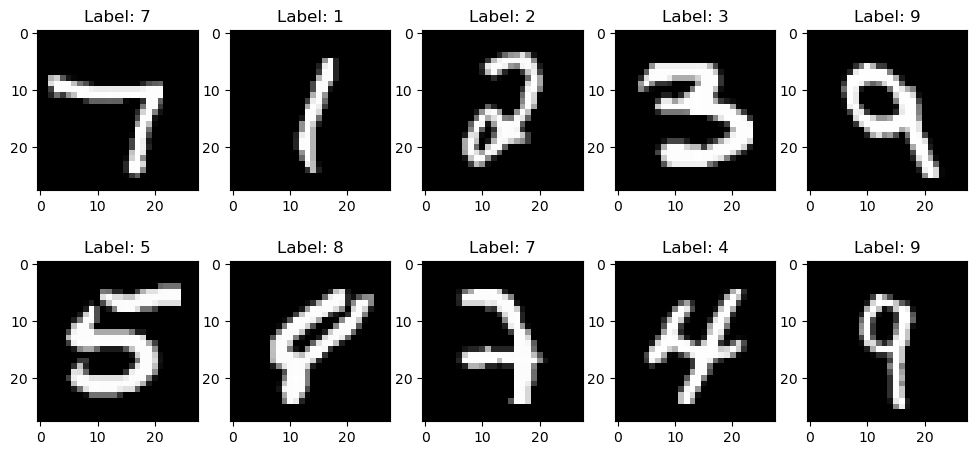

First 10 Randomized Images From Testing Set:



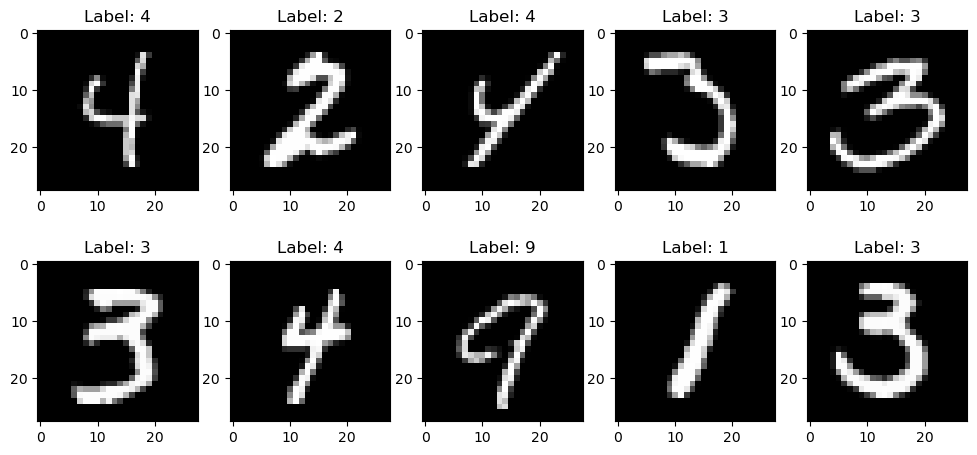

First 10 Randomized Images From Validation Set:



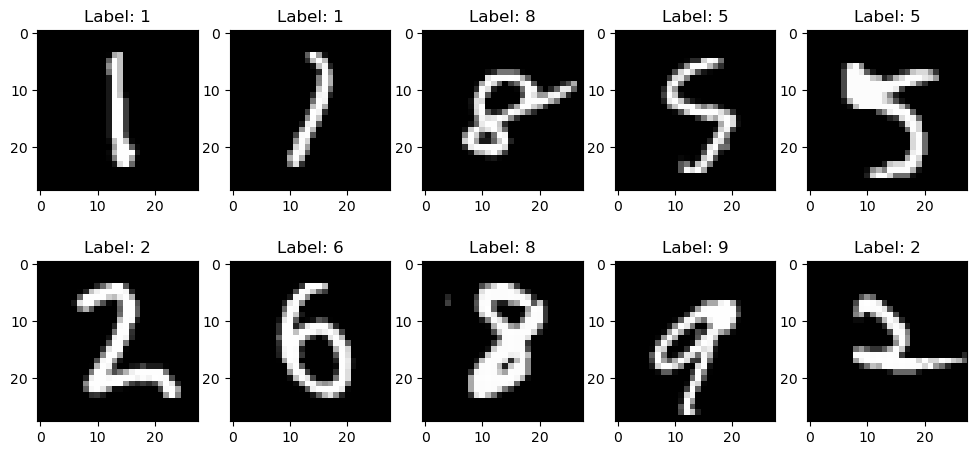

In [7]:
print('First 10 Randomized Images From Training Set:\n')
img_plt(x_train_09[0:10,:,:], y_train_09[0:10]) # Select First 10 images from the set

print('First 10 Randomized Images From Testing Set:\n')
img_plt(x_test_09[0:10,:,:], y_test_09[0:10]) # Select First 10 images from the set

print('First 10 Randomized Images From Validation Set:\n')
img_plt(x_valid_09[0:10,:,:], y_valid_09[0:10]) # Select First 10 images from the set

### Select MNIST Digits 0 - 9:

 - Each individual MNIST image is $ 28 \times 28 $ pixels

#### Create 10 Classes for Digits 0 - 9:

In [8]:
classes2 = np.arange(10)
print(classes2)

[0 1 2 3 4 5 6 7 8 9]


#### Flatten The Images:

 - This takes the $ 28 \times 28 $ 2-D image and makes it into a 784 index 1-D vector

In [9]:
x_train_flat = np.reshape(x_train_09, (x_train_09.shape[0], x_train_09.shape[1] * x_train_09.shape[2]))
x_valid_flat = np.reshape(x_valid_09, (x_valid_09.shape[0], x_valid_09.shape[1] * x_valid_09.shape[2]))
x_test_flat = np.reshape(x_test_09, (x_test_09.shape[0], x_test_09.shape[1] * x_test_09.shape[2]))

#### Scaling Each Pixel Value In The Range $ [0, 1] $:

 - Each original image contains pixel values $ [0, 255] $
 - Calculate min and max of each feature based on the training set.
 - Scale each feature in all sets:

 ##### $$ X_{scaled} = \frac{X - X_{min}}{X_{max} - {X_{min}}} $$

In [10]:
x_train_flat = x_train_flat.astype('float32')
x_train_flat /= 255

x_valid_flat = x_valid_flat.astype('float32')
x_valid_flat /= 255

x_test_flat = x_test_flat.astype('float32')
x_test_flat /= 255

#### Normalizing The Features:

 - Alternative to Scaling using `sklearn.preprocessing.StandardScaler()`

 ##### $$ X_{norm} = \frac{X - \mathrm{\mu}}{\sigma} $$

In [11]:
scaler = StandardScaler()
x_train_flat2 = scaler.fit_transform(x_train_flat)
x_valid_flat2 = scaler.transform(x_valid_flat)
x_test_flat2 = scaler.transform(x_test_flat)

#### Define Model For 10 Classes:

In [22]:
model3 = Sequential()
model3.add(Dense(input_dim = x_train_flat.shape[1], units=512, activation='tanh')) # Hidden Layer 1
model3.add(Dense(units=512, activation='tanh')) # Hidden Layer 2
model3.add(Dense(units=len(classes2), activation='softmax')) # Output Layer (10 classes = 10 neurons)
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 512)               401920    
                                                                 
 dense_10 (Dense)            (None, 512)               262656    
                                                                 
 dense_11 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


#### Compile, Fit & Evaluate Model:

Epoch 1/50
3719/3719 [==============================] - 7s 2ms/step - loss: 0.8850 - accuracy: 0.7908
Epoch 2/50
3719/3719 [==============================] - 6s 2ms/step - loss: 0.4590 - accuracy: 0.8774
Epoch 3/50
3719/3719 [==============================] - 7s 2ms/step - loss: 0.3888 - accuracy: 0.8930
Epoch 4/50
3719/3719 [==============================] - 7s 2ms/step - loss: 0.3557 - accuracy: 0.8996
Epoch 5/50
3719/3719 [==============================] - 7s 2ms/step - loss: 0.3354 - accuracy: 0.9050
Epoch 6/50
3719/3719 [==============================] - 7s 2ms/step - loss: 0.3210 - accuracy: 0.9088
Epoch 7/50
3719/3719 [==============================] - 7s 2ms/step - loss: 0.3101 - accuracy: 0.9117
Epoch 8/50
3719/3719 [==============================] - 7s 2ms/step - loss: 0.3012 - accuracy: 0.9142
Epoch 9/50
3719/3719 [==============================] - 7s 2ms/step - loss: 0.2938 - accuracy: 0.9165
Epoch 10/50
3719/3719 [==============================] - 7s 2ms/step - loss: 0.287

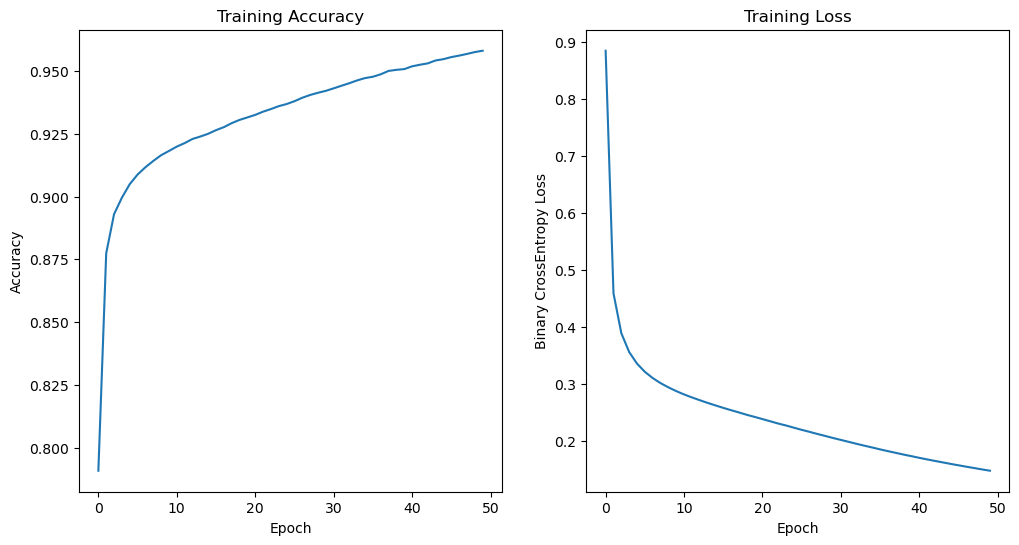

In [13]:
opt3 = tf.keras.optimizers.SGD(learning_rate=0.001)
model3.compile(loss='categorical_crossentropy', optimizer=opt3, metrics=['accuracy'])

# Convert Class Vectors To Binary Class Matrices:
y_train_c = to_categorical(y_train_09, len(classes2))
y_valid_c = to_categorical(y_valid_09, len(classes2))
y_test_c = to_categorical(y_test_09, len(classes2))

history3 = model3.fit(x_train_flat, y_train_c, batch_size=16, epochs=50, verbose=1)

scoreValid3 = model3.evaluate(x_valid_flat, y_valid_c)
print(f'\nTotal Loss On Validation Set: {scoreValid3[0]}\n')
print(f'Accuracy Of Validation Set: {scoreValid3[1]}\n')

accuracyCurve3 = np.array(history3.history['accuracy'])
lossCurve3 = np.array(history3.history['loss'])
plotCurve(accuracyCurve3, lossCurve3)

#### Predict Classes Of Held Out Samples:

In [17]:
testClass3Prob = model3.predict(x_test_flat)
testLabels3 = np.argmax(testClass3Prob, axis = 1)

testAccuracy3 = (accuracy_score(testLabels3, y_test_09) * 100)
print(f'\nThe Accuracy Using The Testing Set Is: {testAccuracy3} %\n')

confusionMatrix3 = confusion_matrix(testLabels3, y_test_09)
print(f'The Confusion Matrix Using Testing Set Is:\n\n{confusionMatrix3}')

313/313 [==============================] - 0s 1ms/step

The Accuracy Using The Testing Set Is: 95.5 %

The Confusion Matrix Using Testing Set Is:

[[ 966    0    6    2    1   10    9    2    4    8]
 [   0 1120    1    1    1    2    3    7    4    7]
 [   1    3  985    7    7    2    4   18    5    2]
 [   2    1    6  969    0   16    1    5   14   12]
 [   0    1    5    0  931    3    6    5    6   21]
 [   3    1    0    5    0  833    7    1   11    4]
 [   6    3    9    1    7   10  924    0    8    0]
 [   1    2    5    8    3    1    1  970    9   11]
 [   1    4   13   11    2    8    3    1  911    3]
 [   0    0    2    6   30    7    0   19    2  941]]


#### Define Another Model To Demonstrate Checkpoints:

In [18]:
model4 = Sequential()
model4.add(Dense(input_dim = x_train_flat.shape[1], units=512, activation='tanh')) # Hidden Layer 1
model4.add(Dense(units=512, activation='tanh')) # Hidden Layer 2
model4.add(Dense(units=len(classes2), activation='softmax')) # Output Layer (10 classes = 10 neurons)
model4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dense_8 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


#### Complile, Fit & Evaluate Saving The Best Model Using Training & Validation Data:

 - Create a checkpoint to save the best model based on the lowest validation loss.
 - Send the validation set to the `fit()` function.
 - Load the best model during testing

Epoch 1/50
3719/3719 [==============================] - 7s 2ms/step - loss: 0.8885 - accuracy: 0.7885 - val_loss: 0.5634 - val_accuracy: 0.8400
Epoch 2/50
3719/3719 [==============================] - 7s 2ms/step - loss: 0.4567 - accuracy: 0.8788 - val_loss: 0.4595 - val_accuracy: 0.8620
Epoch 3/50
3719/3719 [==============================] - 7s 2ms/step - loss: 0.3873 - accuracy: 0.8931 - val_loss: 0.4192 - val_accuracy: 0.8660
Epoch 4/50
3719/3719 [==============================] - 7s 2ms/step - loss: 0.3547 - accuracy: 0.9006 - val_loss: 0.3996 - val_accuracy: 0.8740
Epoch 5/50
3719/3719 [==============================] - 7s 2ms/step - loss: 0.3346 - accuracy: 0.9051 - val_loss: 0.3817 - val_accuracy: 0.8820
Epoch 6/50
3719/3719 [==============================] - 7s 2ms/step - loss: 0.3204 - accuracy: 0.9093 - val_loss: 0.3700 - val_accuracy: 0.8880
Epoch 7/50
3719/3719 [==============================] - 8s 2ms/step - loss: 0.3094 - accuracy: 0.9121 - val_loss: 0.3614 - val_accuracy:

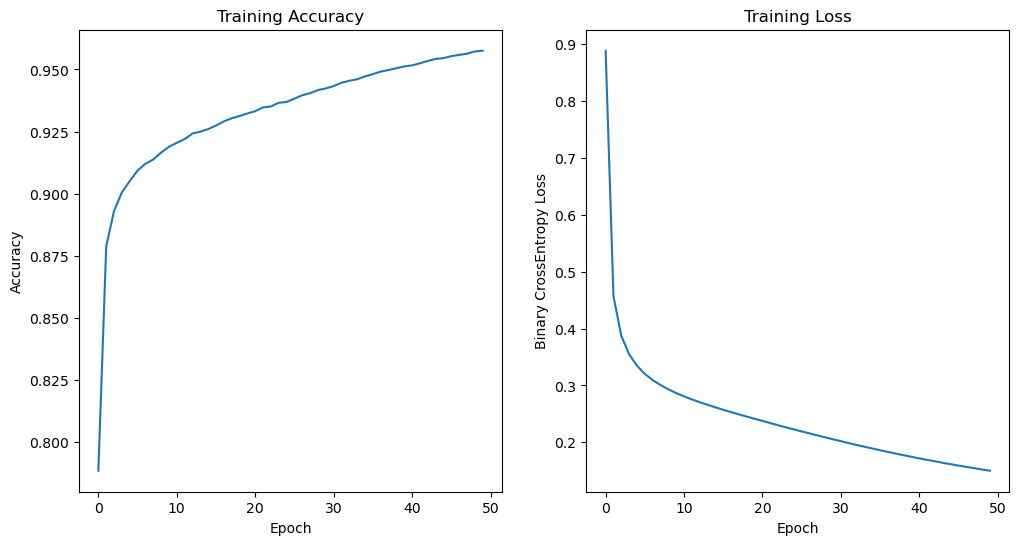

In [19]:
savePath = '../assets/Lecture6/model4_mnist.h5'
callbackSave = ModelCheckpoint(savePath, monitor='val_loss', verbose=0, save_best_only=True, save_freq='epoch')

opt4 = tf.keras.optimizers.SGD(learning_rate=0.001)
model4.compile(loss='categorical_crossentropy', optimizer=opt4, metrics=['accuracy'])

history4 = model4.fit(x_train_flat, y_train_c, batch_size=16, epochs=50, 
            verbose=1, validation_data=(x_valid_flat, y_valid_c), callbacks=[callbackSave])

model4 = load_model(savePath)

scoreValid4 = model4.evaluate(x_valid_flat, y_valid_c)
print(f'\nTotal Loss On Validation Set: {scoreValid4[0]}\n')
print(f'Accuracy Of Validation Set: {scoreValid4[1]}\n')

accuracyCurve4 = np.array(history4.history['accuracy'])
lossCurve4 = np.array(history4.history['loss'])
plotCurve(accuracyCurve4, lossCurve4)

#### Evaluate The Model On The Test Data:

In [21]:
testClass4Prob = model4.predict(x_test_flat)
testLabels4 = np.argmax(testClass4Prob, axis=1)

testAccuracy4 = (accuracy_score(testLabels4, y_test_09) * 100)
print(f'\nThe Accuracy Using The Testing Set = {testAccuracy4} %')

confusionMatrix4 = confusion_matrix(testLabels4, y_test_09)
print(f'The Confusion Matrix Using Testing Set Is:\n\n{confusionMatrix4}')

313/313 [==============================] - 0s 1ms/step

The Accuracy Using The Testing Set = 95.45 %
The Confusion Matrix Using Testing Set Is:

[[ 966    0    7    1    1    9   11    2    4    7]
 [   0 1120    2    1    1    2    3    6    4    7]
 [   1    3  981    7    6    1    2   18    3    1]
 [   1    1    5  962    0   12    1    5   12   11]
 [   0    0    5    0  931    4    5    4    7   20]
 [   4    1    1   16    0  840   12    1    9    6]
 [   6    3    8    1    9   10  919    0    9    1]
 [   1    2    6    9    3    1    1  973   10   12]
 [   1    5   15    9    4    7    4    1  912    3]
 [   0    0    2    4   27    6    0   18    4  941]]
